<a href="https://colab.research.google.com/github/RITIKA-SHARMAA/ML/blob/main/6-Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression**

In [ ]:
Binary

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


data = {
    "age": [22, 25, 47, 52, 46, 56, 55, 60, 62, 61, 18, 28, 27, 29, 49, 55, 25, 58, 19, 18, 21, 26, 40, 45, 50, 54, 23],
    "bought_insurance": [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]
}
df = pd.DataFrame(data)
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


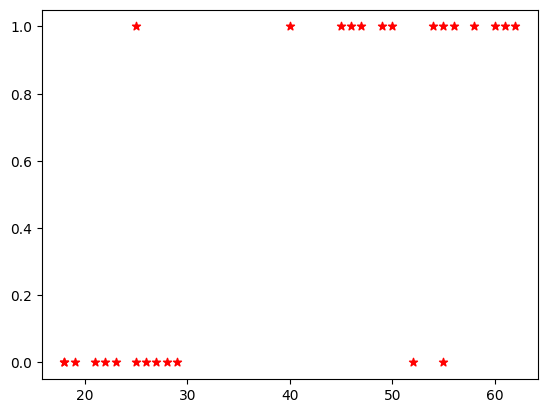

In [5]:
plt.scatter(df.age,df.bought_insurance,marker='*',color='red')


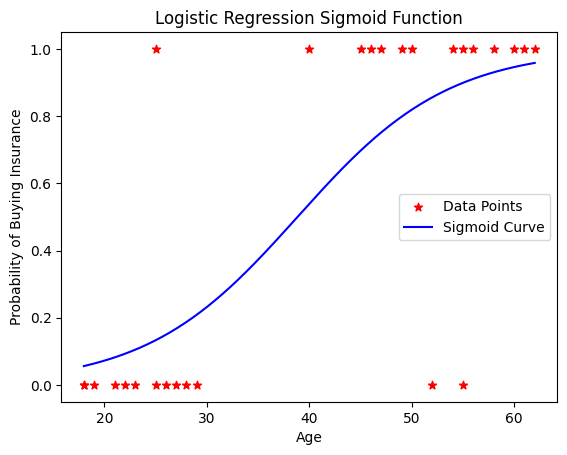

In [16]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Prepare the data
X = df[['age']].values  # Feature (age)
y = df['bought_insurance'].values  # Target

# Train the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Generate a range of ages for smooth plotting
ages = np.linspace(df['age'].min(), df['age'].max(), 300).reshape(-1, 1)

# Predict probabilities (sigmoid output)
predicted_probabilities = model.predict_proba(ages)[:, 1]

# Plot the scatter points
plt.scatter(df.age, df.bought_insurance, marker='*', color='red', label='Data Points')

# Plot the sigmoid curve
plt.plot(ages, predicted_probabilities, color='blue', label='Sigmoid Curve')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Probability of Buying Insurance')
plt.legend()
plt.title('Logistic Regression Sigmoid Function')
plt.show()


In [7]:
#applying train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [8]:
len(X_train)

21

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [10]:
X_test

,age
9,61
10,18
3,52
15,55
26,23
20,21


In [11]:
model. predict(X_test) # shows that person with age 29 would not have insurance(0), age =49 would have(1), age = 23 >> 0, age = 58 >> 1 ,age = 28 >> 10, age = 25 >> 0

array([1, 0, 1, 1, 0, 0])

In [12]:
model.predict([[66]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [13]:
model. predict_proba (X_test) # predict probablity distribution

# 1st value -> probablity of not having insurace
# 2nd value -> probablity of   having insurace

array([[0.02398809, 0.97601191],
       [0.93787873, 0.06212127],
       [0.08610861, 0.91389139],
       [0.056784  , 0.943216  ],
       [0.87739271, 0.12260729],
       [0.9060723 , 0.0939277 ]])

In [14]:
model.score(X_test,y_test)   # accuracy of the model

0.8333333333333334

## **EXERCISE**

# New Section

In [58]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


data2 = pd.read_csv("HR_comma_sep.csv")
data2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [59]:
left = data2[data2.left==1]
left.shape

(3571, 10)

In [53]:
retained = data2[data2.left==0]
retained.shape

(11428, 10)

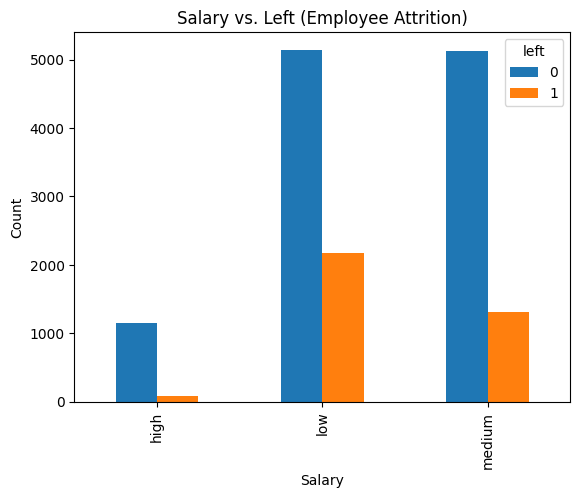

In [56]:
# Use pd.crosstab to create the crosstabulation
pd.crosstab(data2.salary, data2.left).plot(kind='bar')

# Optional: Customize the plot
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Salary vs. Left (Employee Attrition)')
plt.show()


In [62]:
print(df.columns)


Index(['age', 'bought_insurance'], dtype='object')


In [65]:
df.columns = df.columns.str.strip()
data2_encoded.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
left,,,,,,,,,,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,0.058278,0.049265,0.045852,0.047165,0.057315,0.061603,0.273539,0.146482,0.177021,0.450123,0.448810
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,0.033884,0.057127,0.060207,0.025483,0.056847,0.055447,0.283954,0.155419,0.195183,0.608233,0.368804


In [ ]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [ ]:
#applying train and test

import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data2 = pd.read_csv("HR_comma_sep.csv")

# One-Hot Encode categorical columns
data2_encoded = pd.get_dummies(data2, columns=['Department', 'salary'], drop_first=True)

print(data2['salary'].unique())
print(data2_encoded.columns)

# # Train-Test Split
# x = data2_encoded[['satisfaction_level', 'last_evaluation', 'number_project',
#                    'average_montly_hours', 'time_spend_company', 'Work_accident',
#                    'promotion_last_5years', 'Department_RandD', 'Department_hr',
#                    'Department_sales', 'salary_medium', 'salary_high']]

# y = data2_encoded['left']

# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)


In [18]:
# Adjust feature selection
x = data2_encoded[['satisfaction_level', 'last_evaluation', 'number_project',
                   'average_montly_hours', 'time_spend_company', 'Work_accident',
                   'promotion_last_5years', 'Department_RandD', 'Department_hr',
                   'Department_sales', 'salary_medium']]
y = data2_encoded['left']


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)


In [21]:
len(x_train)

11999

In [22]:
len(x_test)

3000

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
x_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_RandD,Department_hr,Department_sales,salary_medium
6723,0.65,0.96,5,226,2,1,0,False,False,False,True
6473,0.88,0.80,3,166,2,0,0,False,False,False,False
4679,0.69,0.98,3,214,2,0,0,False,False,True,False
862,0.41,0.47,2,154,3,0,0,False,False,True,False
7286,0.87,0.76,5,254,2,1,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3297,0.61,0.74,2,143,6,0,0,False,False,True,True
14113,0.93,0.89,3,255,7,1,0,False,False,True,True
5514,0.78,0.61,3,193,3,0,0,False,False,True,True
9939,0.89,0.76,2,278,2,0,0,False,False,True,True


In [31]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
prediction = model.predict([[0.45, 0.8, 5, 250, 3, 0, 0, 0, 1, 0, 1]])
print(prediction)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [37]:
print(data2.columns)
print(data2_encoded.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_low', 'salary_medium'],
      dtype='object')
